In [26]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)

In [ ]:
dataset = pd.read_excel('ProcessedDataset.xlsx')
df = dataset.copy()
# df.columns = ['Unnamed: 0', 'Descripción Orden', 'N° Aviso', 'Ubicación Técnica', 'Denom. Equipo', 'Puesto Trabajo Resp.', 'Fecha Requerida', 'Fecha Inicio Extrema', 'Denominación', 'Hoja de ruta', 'Impacto', 'Autor del Aviso', 'N° Opr', 'Est.Inst', 'Descripción', 'Puesto Trabajo', 'Trabajo', 'Dur.', 'Clase Capacidad', 'Cantidad', 'N° Empleado', 'Fecha Inicio Prog.', 'Hora Inicio Prog.', 'Texto Largo', 'Ficha', 'OT', 'Task', 'TaskGroup', 'Len', 'Q', 'Herramienta', 'Squad', 'Tool', 'Start(p)', 'EarliestDate', 'RequiredDate', 'Impact']

In [14]:
print(f'Numero de Tareas: {len(df)}')
print(f'Numero de OTs: {len(df["OT"].unique())}')

Numero de Tareas: 4898
Numero de OTs: 1055


In [18]:
print(f'Fecha minima: {df["Fecha Inicio Extrema"].min()}')
print(f'Fecha maxima: {df["Fecha Inicio Extrema"].max()}')
print(f'Duracion promedio: {df["Dur."].mean()}')

Fecha minima: 2023-07-17 00:00:00
Fecha maxima: 2023-08-03 00:00:00
Duracion promedio: 1.9220498162515314


In [22]:
print(f'Numero de cuadrillas: {len(df["Puesto Trabajo"].unique())}')
print(f'Numero de Equipos Auxiliares: {len(df["Herramienta"].unique())}')

Numero de cuadrillas: 31
Numero de Equipos Auxiliares: 16


Impact
2    2403
3    1829
1     666
Name: count, dtype: int64


<Axes: xlabel='Impact'>

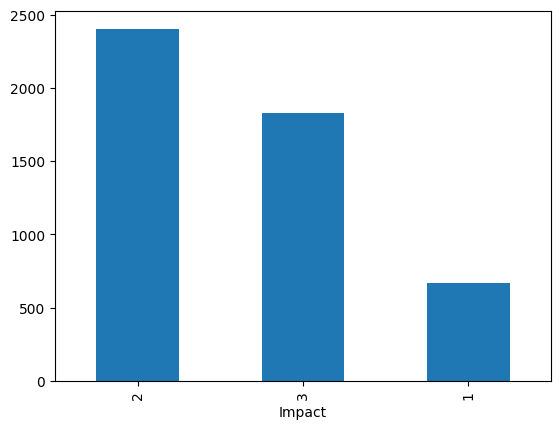

In [29]:
print(df['Impact'].value_counts())
df['Impact'].value_counts().plot(kind='bar')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/laptop/Documents/Magister/Memoria/git/imgs/impact_distribution.png'

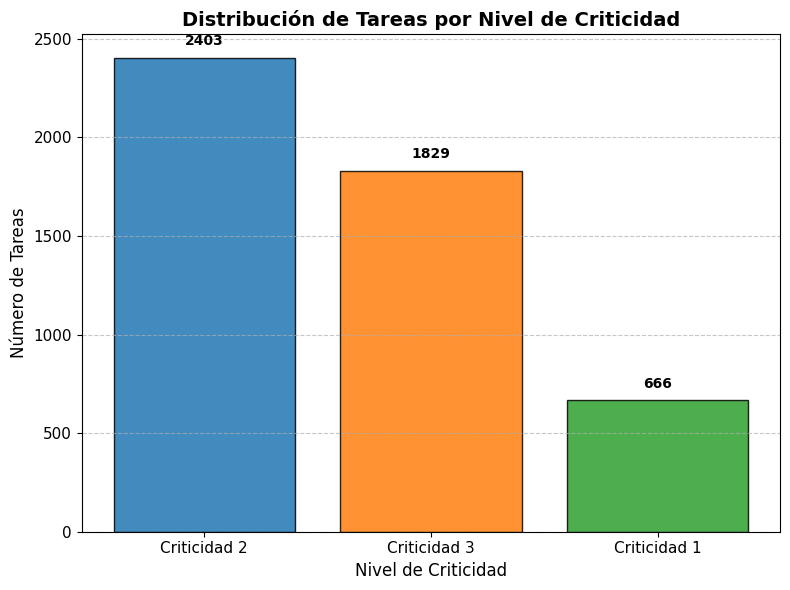

In [30]:
import matplotlib.pyplot as plt

# Datos para el gráfico (simulado según la información proporcionada)
impact_counts = {'Criticidad 2': 2403, 'Criticidad 3': 1829, 'Criticidad 1': 666}

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colores personalizados
plt.bar(impact_counts.keys(), impact_counts.values(), color=colors, edgecolor='black', alpha=0.85)

# Títulos y etiquetas
plt.title('Distribución de Tareas por Nivel de Criticidad', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Criticidad', fontsize=12)
plt.ylabel('Número de Tareas', fontsize=12)

# Líneas de cuadrícula solo en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valores en las barras
for i, val in enumerate(impact_counts.values()):
    plt.text(i, val + 50, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estilizar el gráfico
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# Guardar el gráfico como una imagen de alta calidad para incluirlo en el documento LaTeX
plt.savefig('imgs/impact_distribution.png', dpi=300)
plt.show()


In [58]:
import altair as alt
import pandas as pd

# Datos para el gráfico
data = pd.DataFrame({
    'Nivel de Criticidad': ['1', '2', '3'],
    'Número de Tareas': [666, 2403, 1829]
})

# Color personalizado (de la tercera barra)
custom_color = '#d4605b'

# Crear el gráfico de barras
bars = (
    alt.Chart(data)
    .mark_bar(color=custom_color, width=40, cornerRadiusTopLeft=3, cornerRadiusTopRight=3)
    .encode(
        x=alt.X(
            'Nivel de Criticidad:N',  # Definir como nominal (N) para mantener el orden deseado
            sort=['1', '2', '3'],    # Orden de menor a mayor
            title='Nivel de Criticidad'
        ),
        y=alt.Y('Número de Tareas', title='Número de Tareas'),
        tooltip=['Nivel de Criticidad', 'Número de Tareas']
    )
)

# Agregar etiquetas sobre las barras
text = (
    alt.Chart(data)
    .mark_text(dy=-5, fontSize=12, fontWeight='bold', color='black')
    .encode(
        x=alt.X('Nivel de Criticidad:N', sort=['1', '2', '3']),
        y=alt.Y('Número de Tareas'),
        text=alt.Text('Número de Tareas:Q')
    )
)

# Combinar barras y texto
chart = (
    (bars + text)
    .properties(
        title='Distribución de Tareas por Nivel de Criticidad',
        width=300,
        height=300
    )
    .configure_title(
        fontSize=16,
        font='Arial',
        anchor='start',
        color='black',
        offset=20  # Espacio entre el título y el gráfico
    )
    .configure_axis(
        labelFontSize=12, titleFontSize=14, labelAngle=0  # Eje X horizontal
    )
)

# Mostrar el gráfico
chart


alt.LayerChart(...)

In [62]:
import altair as alt
import pandas as pd

# Datos para el gráfico
data = pd.DataFrame({
    'Configuración': ['a', 'b', 'c', 'd'],
    'Tareas Programadas': [0, 4854, 4658, 4831],
    'Makespan': [0, 1072, 492.75, 516.25],
    'Tiempo de Solución (s)': [3.43, 4.35, 8.42, 9.95]
})

# Crear el gráfico de burbujas
chart = (
    alt.Chart(data)
    .mark_circle()
    .encode(
        x=alt.X(
            'Tiempo de Solución (s):Q', 
            title='Tiempo de Solución (s)', 
            axis=alt.Axis(tickCount=5)
        ),
        y=alt.Y(
            'Makespan:Q', 
            title='Makespan', 
            axis=alt.Axis(tickCount=5)
        ),
        size=alt.Size(
            'Tareas Programadas:Q', 
            title='Tareas Programadas', 
            scale=alt.Scale(range=[100, 1000])
        ),
        color=alt.Color(
            'Configuración:N', 
            scale=alt.Scale(scheme='tableau10'), 
            title='Configuración'
        ),
        tooltip=['Configuración', 'Tareas Programadas', 'Makespan', 'Tiempo de Solución (s)']
    )
    .properties(
        title='Relación entre Tiempo de Solución, Makespan y Tareas Programadas',
        width=300,
        height=300
    )
)

# Agregar etiquetas para las configuraciones
text = (
    alt.Chart(data)
    .mark_text(align='center', dy=-10, fontSize=12, fontWeight='bold', color='black')
    .encode(
        x=alt.X('Tiempo de Solución (s):Q'),
        y=alt.Y('Makespan:Q'),
        text='Configuración'
    )
)

# Combinar gráfico y etiquetas
final_chart = (chart + text).configure_title(
    fontSize=16,
    font='Arial',
    anchor='start',
    color='black',
    offset=20  # Espacio entre el título y el gráfico
)

# Exportar gráfico si es necesario
# from altair_saver import save
# save(final_chart, "imgs/alpha_beta_bubble_analysis_with_offset_fixed.png")

# Mostrar el gráfico
final_chart


alt.LayerChart(...)

In [64]:
from utils import read_json
import numpy as np

tasks_df, squads_df, tools_df = read_json('tasks.json')


In [65]:
df = tasks_df.copy()
df = df[['TaskID', 'SquadID', 'ToolID']]
# df = df[df.SquadID != 20]
# df = df[df.SquadID != 5]

df = df[~df.SquadID.isin([20, 5, 28, 21, 17, 3])]
df = df[~df.ToolID.isin([41, 42, 33])]

df

,TaskID,SquadID,ToolID
0,0,11,<NA>
1,1,11,<NA>
2,2,11,<NA>
3,3,11,<NA>
4,4,11,<NA>
...,...,...,...
4893,4893,4,<NA>
4894,4894,11,<NA>
4895,4895,8,<NA>
4896,4896,12,<NA>


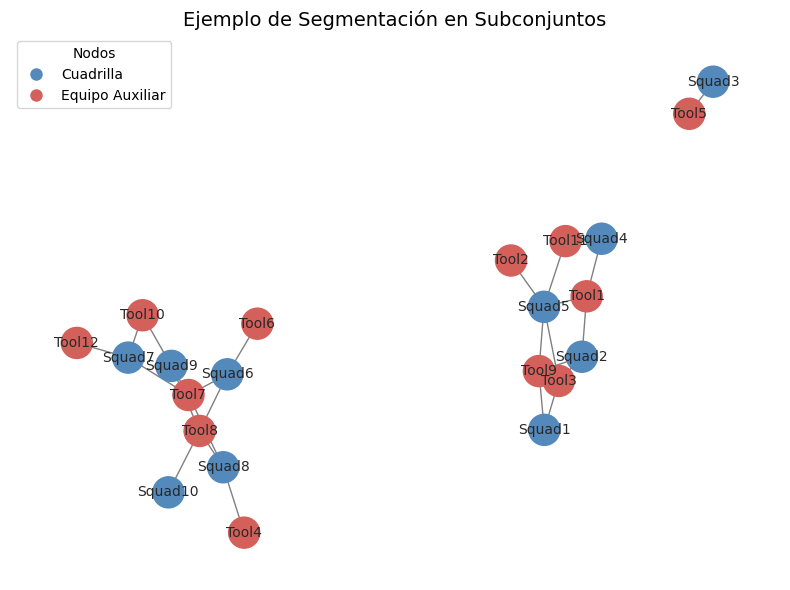

In [66]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Dataset sintético
# Crear DataFrame
tasks_df = df.copy()
# Crear grafo a partir del DataFrame
graph = nx.Graph()

# Agregar edges al grafo (SquadID -> ToolID)
for _, row in tasks_df.dropna(subset=['ToolID']).iterrows():
    graph.add_edge(f"Squad{int(row['SquadID'])}", f"Tool{int(row['ToolID'])}")

# Obtener nodos únicos del grafo y reasignar correlativos
nodes = list(graph.nodes)
squad_nodes = [node for node in nodes if "Squad" in node]
tool_nodes = [node for node in nodes if "Tool" in node]

# Crear mapeos para nuevos identificadores consecutivos
squad_mapping = {node: f"Squad{idx+1}" for idx, node in enumerate(sorted(squad_nodes))}
tool_mapping = {node: f"Tool{idx+1}" for idx, node in enumerate(sorted(tool_nodes))}
node_mapping = {**squad_mapping, **tool_mapping}

# Renombrar los nodos del grafo
graph = nx.relabel_nodes(graph, node_mapping)

# Dibujar el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)  # Layout para la posición de los nodos
nx.draw_networkx_nodes(
    graph, pos,
    node_color=['#5489bb' if 'Squad' in node else '#d4605b' for node in graph.nodes],
    node_size=500
)
nx.draw_networkx_edges(graph, pos, edge_color='gray')
nx.draw_networkx_labels(graph, pos, font_size=10, font_color='#282828')

# Leyenda
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Cuadrilla', markerfacecolor='#5489bb', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Equipo Auxiliar', markerfacecolor='#d4605b', markersize=10)
], loc='upper left', title="Nodos")

plt.title("Ejemplo de Segmentación en Subconjuntos", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

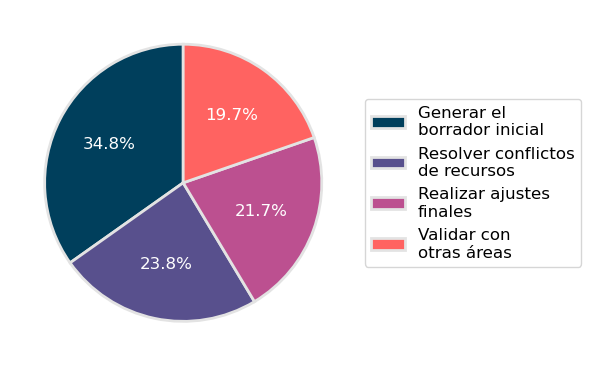

In [29]:
import matplotlib.pyplot as plt
import textwrap

# Data for the distribution of time in schedule creation
labels = [
    "Generar el\nborrador inicial",
    "Resolver conflictos\nde recursos",
    "Realizar ajustes\nfinales",
    "Validar con\notras áreas"
]
percentages = [34.8, 23.8, 21.7, 19.7]

# Colors for the pie chart
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    percentages, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    textprops={'fontsize': 14},  # Font size for numbers
    wedgeprops={'edgecolor': '#e3e3e3', 'linewidth': 2}  # Add border to slices
)

# Add a legend outside the pie chart
ax.legend(
    wedges, 
    labels, 
    # title="Actividades", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1), 
    fontsize=12
)


# Customizing the font size of the percentages inside the pie chart
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')  # Set text color to white


# # Setting the title
# plt.title(
#     "Distribución del Tiempo Total en la\nCreación de Cronograma",
#     fontsize=16, 
#     pad=20  # Adding vertical space between title and chart
# )

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()